<a href="https://colab.research.google.com/github/Balenm/AutoTrader/blob/main/AutoTrader_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An overview

The objective of this project is to predict the price of the cars extracted from AutoTrader website in United Kingdom. We have previously, cleaned the data, and extracted many useful information. Besides, we have also highlighted soeme features as important through feature selection methods. For this specific part, I will be creating a suitable (based on accuracy, precision and specificity) model that can predict the price of car. Below are the main steps I will be taking in this project to achieve the desired results: 

1. In-depth evaluation of the features using SHAP values
2. Choosing a suitable Machine Learning model
2. Training the model
3. Evaluation of the model
4. Hyperparameter Tuning
5. Predictions

## Importing Processed Train and Test Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
auto_X_train = pd.read_csv("https://raw.githubusercontent.com/Balenm/AutoTrader/main/source_files/processed_data/auto_x_train.csv", index_col = "pub_ref")
auto_y_train = pd.read_csv("https://raw.githubusercontent.com/Balenm/AutoTrader/main/source_files/processed_data/auto_y_train.csv", index_col = "pub_ref")
auto_X_test = pd.read_csv("https://raw.githubusercontent.com/Balenm/AutoTrader/main/source_files/processed_data/auto_X_test.csv", index_col = "pub_ref")
auto_y_test = pd.read_csv("https://raw.githubusercontent.com/Balenm/AutoTrader/main/source_files/processed_data/auto_y_test.csv", index_col = "pub_ref")

Applying one-hot-encoding on `crossover` and `condition` to make the data balanced and help the model make better prediction: 

In [4]:
auto_X_train = pd.get_dummies(auto_X_train, columns=["condition","crossover"])
auto_X_test = pd.get_dummies(auto_X_test, columns=["condition","crossover"])

## SECTION 1: Choosing a Suitable Machine Learning Model

There are many factors such as type of problem, quality of the data, computational power and the business requirements of the data. According to a blog posted on SAS company's website, if our aim is to predict a number (price in this case) we should consired using either Decision Tree, Linear Regression or Random Forrest, Neural Network and/or Gradiant Boosting Tree models as outlined below: 

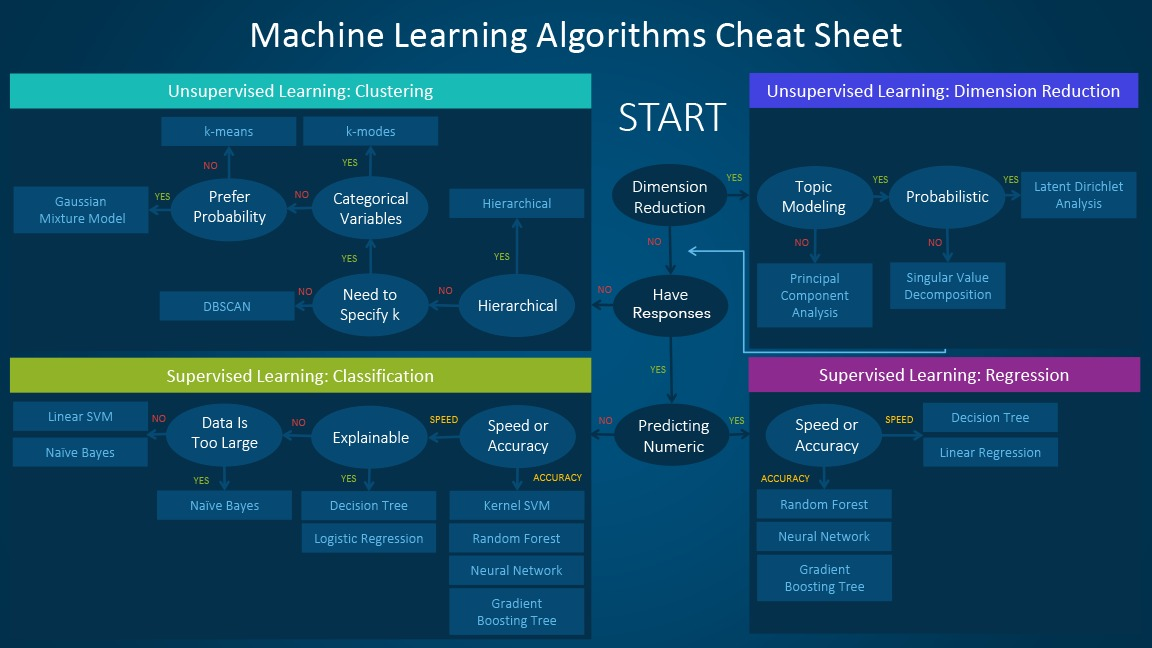

### 1.1 K-Fold Cross Validation Technique
Choosing between the five mentioned models can be a time-consuming and complex process. For us to choose the best model, we use K-Fold cross validation technique which depends on measuring the performance of each model basedn on the K-Folds of our training dataset. For this project I am comparing decision tree, linear regression and Random Forest Regressor models' performances. 

In [ ]:
%%capture
# Importing relevant libraries 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, StratifiedGroupKFold

# Initiating the list of Models
models = [("DTR", DecisionTreeRegressor()), 
              ("LR", LinearRegression()),
              ("RFR", RandomForestRegressor()), 
]

#Looping over the models, and calculating their results
results = dict()
for name, model in models:
  skfold = StratifiedGroupKFold(n_splits=3)
  cross_val_results = cross_val_score(model, auto_X_train,
                                      auto_y_train.values.ravel(),
                                      cv= skfold, scoring='accuracy'
                                      )
  results[name] = (cross_val_results.mean(), cross_val_results.std())

In [73]:
for key, value in results.items():
  print (key, value)

DTR (nan, nan)
LR (nan, nan)
RFR (nan, nan)


Based on above results, using (_________) is the best option since it shows the best and most accurate results among the other two options. Hence, we select this model to for the prediction of the car prices. 

In [63]:
rfr = RandomForestRegressor(n_estimators=15) #we keep our number of estimators at 15 to reduce the computing time 
rfr.fit(auto_X_train, auto_y_train.values.ravel())

RandomForestRegressor(n_estimators=15)

In [57]:
import shap

explainer = shap.TreeExplainer(rfr)
test_500_sample = auto_X_test.sample(500, random_state=40)
shap_values = explainer.shap_values(auto_X_test.sample(500))

In [60]:
shap.initjs()
# a local explanation with force_plot
shap.force_plot(
    explainer.expected_value, 
    shap_values[349], 
    auto_X_test.iloc[263]
)

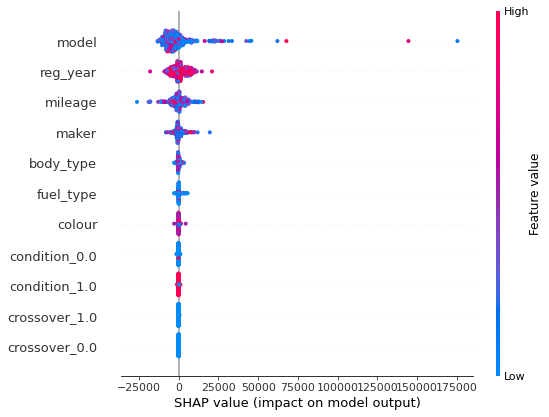

In [61]:
shap.summary_plot(shap_values, test_500_sample)